REMAINING:
 6. Test with another data set


# Multivariate Linear Regression Using Batch Gradient Descent Optimisation

Aim: Using information about abalone to predict number of rings inside the shell.

Procedure:
1. The dataset is divided into 20% test, and 80% training data.
2. The parameters of multivariate regression are found.
3. Basis for accuracy is mean root square error from actual number of rings.
4. Analysis is done as specified below.

To analyse:
1. If you vary alpha, how is J($\theta$) varying?
2. With and without normalisation, how is the gradient changing - use a contour graph.
3. Similarly for regularisation.
4. Similarly for lambda / lambda variation.

Note:
1. The dataset information can be found in the submitted folder in a file named, 'abalone_names.txt'.

Team Members in Chronological Order:
1. 177109 - Ashwin Ganesan
2. 177110 - Suraj Baradhi
3. 177154 - Rudraksh Kapil
4. 177246 - Pranav Pradeep

##### Step 1: Get Dataset

In [57]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in the dataset as entered by terminal
#path = input()
dataframe = pd.read_csv('cancer.csv') 
dataframe

,b,c,d,d.1,d.2,d.3,d.4,d.5,d.6,D
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [58]:
# convert dataframe into ndarray for numpy
data = dataframe.to_numpy(dtype = np.float64)

# print relevant metadata
m = data.shape[0]
n = data.shape[1]-1  # -1 since last column is target variable 

print("For This Dataset:")
print("m = ", m)
print("n = ", n) 

For This Dataset:
m =  699
n =  9


##### Step 2: Partition Data
We will have the first $80\%$ as training set and the rest $20\%$ as testing set.

In [59]:
# get counts
trainCount = int(0.8*m)
testCount = m - trainCount

# training set
X_train = data[:trainCount, :n]
Y_train = data[:trainCount, n]

# testing set
X_test = data[trainCount:, :n]
Y_test = data[trainCount:, n]

##### Step 3: Define Hypothesis Function 
##### $h_{\theta}(x) = \theta^{T}X$ 
The hypothesis function returns:
1. Predicted value of target variable (rings) 

Given:
1. Parameter Matrix '$\theta$' $ = \theta_{0}, \theta_{1}, ... , \theta_{n}$
2. Feature Matrix 'X' with dimensions m * (n+1)

In [60]:
def hypothesis(theta, X):
    # h is matrix with 1 col and same rows as X with each entry = 1
    h = np.dot(X, np.transpose(theta))
    return h

##### Step 4: Define Batch Gradient Descent Function 

$\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial \theta_{j}}J(\theta_{0}, \theta_{1}, ..., \theta_{n})$ for all $j = 0,...,n$

Where our cost function is: <br>
$J(\theta_{0}, \theta_{1}, ..., \theta_{n}) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

<br>
Therefore we can simplify the gradient descent function: <br>
$\theta_{j} := \theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}$

<br><br>
But for optimised code, we utilise vectorisation methods to get the following formula:<br>
$\theta = \theta - \frac{\alpha}{m}(X^{T}(X\theta - Y))$


<br><br>
The BGD function returns:
1. Optimised '$\theta$' list of size (n+1)
2. Cost list 'cost' of size num_iters containing value of cost function over all iterations

Given:
1. Current '$\theta$'
2. Learning Rate '$\alpha$'
3. Number of Iterations 'num_iters'
4. List of Hypothesis Values of All Samples 'h'
5. Feature Matrix 'X'
6. Target Variable Vector 'y'
7. Number of Features 'n'

In [61]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    # cost is a 1-D matrix of size num_iters, all originally 1s
    cost = np.ones(num_iters)

    # for each iteration
    for i in range(0, num_iters):
        # Update theta values according to vectorised formula
        theta = theta - (alpha/X.shape[0]) * np.dot(np.transpose(X), 
                                                    np.subtract(
                                                        np.dot(X, 
                                                               theta)
                                                        , y))
        
        
        # get new hypothesis and store cost for this iteration
        h = hypothesis(theta, X)
        cost[i] = (1/X.shape[0]) * 0.5 * np.sum(np.square(h-y))
        
    # convert theta into 1 row and n+1 columns and return with cost
    theta = np.reshape(theta, (1, n+1))
    return theta, cost

##### Step 5: Define Linear Regression Function
The linearRegression function returns:
1. Final Optimised '$\theta$'
2. List Storing Cost History 'cost'

Given:
1. Feature Matrix 'X'
2. Target Variable Vector 'y'
3. Learning Rate '$\alpha$'
4. Number of Iterations 'num_iters'

In [62]:
def linearRegression(X, y, alpha, num_iters):
    # n is number of columns in X
    n = X.shape[1]
    
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    
    # initializing the parameter vector with 0s and calculate initial hypothesis
    theta = np.zeros(n+1)
    h = hypothesis(theta, X)
    
    # perform batch gradient descent and return theta and cost
    theta, cost = BGD(theta, alpha, num_iters, h, X, y, n)
    return theta, cost

##### Step 6: Perform Linear Regression And Output Error Measures
After this, we get the optimum values of theta and we plot a graph showing that, as the number of iterations increase, we get closer to the actual optimum values since cost decreases.
<br>
Note: The first following cell is for error analysis, and the linear regression call is made in the next cell.

In [78]:
# calculates mean error, mean square error and mean root_square error
def errorAnalysis(X, Y, theta):
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1)) 
    X = np.concatenate((one_column, X), axis = 1)
    
    # get predicted values according to theta
    h_test = hypothesis(theta, X)
    
    # calculate difference between predicted and actual, square of this and then divide by Y of this.
    h_test = h_test.flatten()
    diffarray = np.absolute(np.subtract(h_test, Y))
    diffsarray = np.square(diffarray)
    divarray = np.divide(diffarray, Y)
    
    # Calculating the mean error
    meanerror = np.average(divarray)
    print ('Mean Error => ', meanerror)
    
    # Calculating the mean square error
    meanserror = np.average(diffsarray)
    print('Mean square error => ', meanserror)

    # Calculate root mean square error
    print('Root Mean Square Error => ', np.sqrt(meanserror))

[Theta Values]:
  [[ 0.51747619  0.17045199 -0.05532359  0.01834317  0.020487    0.12264758
   0.07096844  0.14946683  0.013197    0.04672948]]
[Error Analysis]:
Mean Error =>  0.39786148427575835
Mean square error =>  1.9094385722318563
Root Mean Square Error =>  1.381824363742316


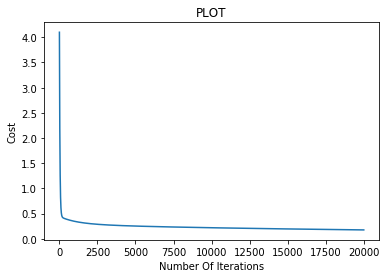


[Time Analysis]:
CPU times: user 647 ms, sys: 19.9 ms, total: 667 ms
Wall time: 694 ms


In [64]:
%%time

# call function
num_iters = 20000
learning_rate = 0.0001
theta, cost = linearRegression(X_train, Y_train, learning_rate, num_iters)

# print thetas
print("[Theta Values]:\n ", theta)

# analyse error
print("[Error Analysis]:")
errorAnalysis(X_test, Y_test, theta)

# plot cost graph
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost)
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT')
plt.show()


print("\n[Time Analysis]:")

##### Step 7: Observe effect of varying $\alpha$ on the cost, '$J$'
Here we repeat the linear regression for different values of $\alpha$ and plot these graphs on the same plot 

[Minimum Costs]:
0.01  =>  0.08559542102315208
0.001  =>  0.0856881879693553
0.0001  =>  0.17628387141846466
1e-05  =>  0.30139070808558505
1e-06  =>  0.4284676318641416


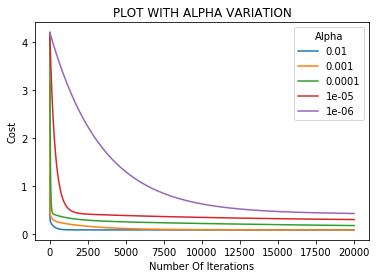


[Time Analysis]:
CPU times: user 2.41 s, sys: 31.3 ms, total: 2.44 s
Wall time: 2.5 s


In [67]:
%%time

num_iters = 20000

# generate learning rates
alphas = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
print('[Minimum Costs]:')

# perform linear regression and get costs for each alpha
for alpha in alphas:
    theta, cost = linearRegression(X_train, Y_train, alpha, num_iters)
    cost = list(cost)
    
    # plot the costs
    num_iterations = [x for x in range(1, num_iters+1)]
    plt.plot(num_iterations, cost, label = alpha)
    plt.xlabel('Number Of Iterations')
    plt.ylabel('Cost')

    # print the final costs
    print(alpha, ' => ', cost[-1])
    
# plot the graphs
plt.legend(loc = 'best', title = 'Alpha')
plt.title('PLOT WITH ALPHA VARIATION')
plt.show()


print("\n[Time Analysis]:")

##### Step 8: Perform Linear Regression With Feature Scaling
θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven. Hence, feature scaling is useful for this regression analysis.

<br>
Here we repeat the linear regression after scaling the features by using:
1. z-score scaling: $x_j^{(i)'} = \frac{x_j^{(i)} - \mu(j)}{\sigma(j)}$
2. min-max scaling: $x_j^{(i)'} = \frac{x_j^{(i)} - min(x_j)}{max(x_j) - min(x_j)}$
3. mean scaling: $x_j^{(i)'} = \frac{x_j^{(i)} - ave(x_j)}{max(x_j) - min(x_j)}$

These functions return:
1. Scaled feature matrix 'X_new'

Given:
1. Original feature matrix 'X'

In [68]:
# Function definitions
def zscoreFeatureScaling(X):
    # get standard deviation and mean
    std = np.std(X, axis = 0)
    std = np.tile(std,(X.shape[0],1))
    mean = np.mean(X,axis = 0)
    mean = np.tile(mean,(X.shape[0],1))

    # scale by subtracting mean and then dividing by std
    X_new = np.copy(X)
    X_new = np.subtract(X_new, mean)
    X_new = np.divide(X_new, std)

    return X_new


def minMaxFeatureScaling(X):
    # min array holds min of each column, max array holds max of each column
    min_array = np.min(X, axis = 0)
    min_array = np.tile(min_array, (X.shape[0],1))
    max_array = np.max(X, axis = 0)
    max_array = np.tile(max_array, (X.shape[0],1))
    
    # scale each element accordingly
    X_new = np.copy(X)
    X_new = np.subtract(X_new, min_array)
    X_new = np.divide(X_new, np.subtract(max_array, min_array))
    
    return X_new

def meanFeatureScaling(X):
    # min array holds min of each column, max array holds max of each column, similarly for mean
    min_array = np.min(X,axis = 0)
    min_array = np.tile(min_array,(X.shape[0],1))
    max_array = np.max(X,axis = 0)
    max_array = np.tile(max_array,(X.shape[0],1))
    mean = np.mean(X,axis = 0)
    mean = np.tile(mean,(X.shape[0],1))
    
    # scale each element accordingly
    X_new = np.copy(X)
    X_new = np.subtract(X_new, mean)
    X_new = np.divide(X_new, np.subtract(max_array, min_array))
    
    return X_new

[Error Analysis With Z-score Scaling]:
Mean Error =>  0.3162645324857589
Mean square error =>  1.447685543884846
Root Mean Square Error =>  1.2031980484877982

 [[1.26359292 0.09855276 0.00445863 0.03914943 0.01869208 0.04165966
  0.08195638 0.05983882 0.02991109 0.02114017]]
[Error Analysis With Z-score Scaling]:
Mean Error =>  1.5505455472369494
Mean square error =>  17.588267489149334
Root Mean Square Error =>  4.193836845795189

 [[2.73690621 0.2296979  0.08023701 0.12082108 0.05384358 0.0422516
  0.31116081 0.08425083 0.10413841 0.02444027]]

[Error Analysis With MinMax Scaling]:
Mean Error =>  4.04219843703602
Mean square error =>  135.32058743934965
Root Mean Square Error =>  11.632737744802366

 [[1.79222536 0.6795131  0.29896751 0.34556098 0.24534989 0.32823664
  0.60092389 0.4117864  0.28560713 0.08158212]]

[Error Analysis With Mean Scaling]:
Mean Error =>  4.159952806515426
Mean square error =>  139.06125069426358
Root Mean Square Error =>  11.792423444494503

 [[2.73690621

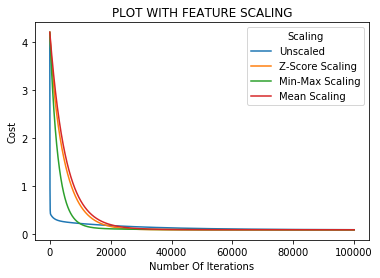


[Time Analysis]:
CPU times: user 20.3 s, sys: 175 ms, total: 20.5 s
Wall time: 12 s


In [77]:
%%time

# parameters
num_iters = 20000
learning_rate = 0.0001

# call functions
X_train_zscaled = zscoreFeatureScaling(X_train)
X_train_mmscaled = minMaxFeatureScaling(X_train)
X_train_meanscaled = meanFeatureScaling(X_train)

# plot cost graph without feature scaling 
theta, cost = linearRegression(X_train, Y_train, learning_rate, num_iters)
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost)

# analyse error
print("[Error Analysis With Z-score Scaling]:")
errorAnalysis(X_test, Y_test, theta)
print('\n', theta)

# plot cost graph with zscore feature scaling
theta, cost = linearRegression(X_train_zscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("[Error Analysis With Z-score Scaling]:")
errorAnalysis(X_test, Y_test, theta)
print('\n', theta)


# plot cost graph with min max feature scaling 
theta, cost = linearRegression(X_train_mmscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n[Error Analysis With MinMax Scaling]:")
errorAnalysis(X_test, Y_test, theta)
print('\n', theta)


# plot cost graph with mean feature scaling 
theta, cost = linearRegression(X_train_meanscaled, Y_train, learning_rate, num_iters)
cost = list(cost)
plt.plot(num_iterations, cost)

# analyse error
print("\n[Error Analysis With Mean Scaling]:")
errorAnalysis(X_test, Y_test, theta)
print('\n', theta)


# plot labels
plt.legend(['Unscaled','Z-Score Scaling','Min-Max Scaling','Mean Scaling'],loc = 'best', title = 'Scaling')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT WITH FEATURE SCALING')
plt.show()


print("\n[Time Analysis]:")

##### Step 9: Contour Plots To Show Effect Of Feature Scaling
Feature scaling is expected to reduce the difference in feature variations, leading to a more circular contour plot.
To show the contour plot, we take values from -50 to 50 on the X and Y axes (corresponding to $\theta_1$ and $\theta_2$) and then calculate the error from using these values of $\theta$.

We define a function getErrors that returns
1. Matrix of size 50x50 showing error at each value of $\theta_1$ and $\theta_2$ 'Z'
2. Matrix of size 50x50 showing $\theta_1$ values 'X'
2. Matrix of size 50x50 showing $\theta_2$ values 'Y'

Given:
1. Feature Matrix 'X_train'

In [70]:
def getErrors(X_train):
    # make a copy of theta to operate on 
    theta1 = theta

    # concatenate a 1s column to the start training data
    one_column = np.ones((X_train.shape[0], 1)) 
    X_t = np.concatenate((one_column, X_train), axis = 1)

    # get X and Y for 50 points between -50 and 50
    t1 = np.linspace(-50,50)
    t2 = np.linspace(-50,50)
    X,Y = np.meshgrid(t1,t2)

    # For each point, find the error
    Z = np.ones(2500)
    for i in range(50):
        for j in range(50):
            # alter theta values and calculate new hypothesis
            theta1[0][0] = X[i][j]
            theta1[0][1] = Y[i][j]
            hyp = hypothesis(theta1, X_t)

            # calculate difference between predicted and actual, square of this and then divide by Y of this.
            hyp = hyp.flatten()
            diffarray = np.absolute(np.subtract(hyp, Y_train))
            diffsarray = np.square(diffarray)
            divarray = np.divide(diffarray, Y_train)
            error = np.average(divarray)
            
            # store error
            Z[50*i+j] = error

    # reshape it into 50, 50
    Z = Z.reshape(50,50)
    return X,Y,Z

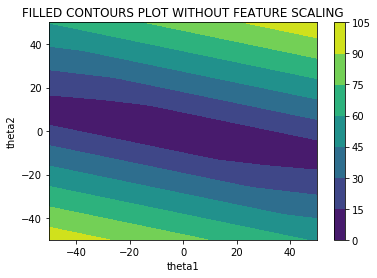

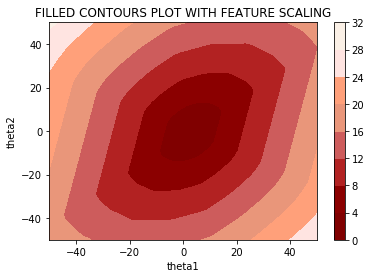


[Time Analysis]:
CPU times: user 512 ms, sys: 25.7 ms, total: 537 ms
Wall time: 564 ms


In [71]:
%%time

# get points using the above function
X1,Y1,Z1 = getErrors(X_train)
X2,Y2,Z2 = getErrors(X_train_zscaled)

# plot first
cp = plt.contourf(X1, Y1, Z1)
plt.colorbar(cp)        # Add a colorbar to the plot
plt.title('FILLED CONTOURS PLOT WITHOUT FEATURE SCALING')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()

# plot second
cp = plt.contourf(X2, Y2, Z2, colors=['maroon','darkred','firebrick','indianred','darksalmon','lightsalmon','mistyrose','linen'])
plt.colorbar(cp)        # Add a colorbar to the plot
plt.title('FILLED CONTOURS PLOT WITH FEATURE SCALING')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()


print("\n[Time Analysis]:")

##### Step 10: Perform Linear Regression With Regularisation
Regularisation is done to prevent over-fitting.
It is implemented by adding a “penalty” term to the best fit derived from the trained data, in order to achieve a lesser variance with the tested data. 
It also restricts the influence of predictor variables over the output variable by compressing their coefficients.

The penalty term is as follows:<br> $|| \theta ||^{2}$

Hence, the new cost function that we want to minimise is:<br> $ ||X\theta -Y||^{2} +  \lambda ||\theta||^{2}$

The gradient is given by the optimised matrix formula:<br>
$\theta = \theta - \frac{\alpha}{m}(X^{T}(Y-X\theta)+\lambda\theta)$


So we modify our BGD function to BGDWithRegularisation that returns:<br>
1. Optimised '$\theta$' list of size (n+1)
2. Cost list 'cost' of size num_iters containing value of cost function over all iterations

Given: <br>
1. Current '$\theta$'
2. Learning Rate '$\alpha$'
3. Number of Iterations 'num_iters'
4. List of Hypothesis Values of All Samples 'h'
5. Feature Matrix 'X'
6. Target Variable Vector 'y'
7. Number of Features 'n'
8. Regularisation constant '$\lambda$'

We also modify our linearRegression function to linearRegressionWithRegularisation that returns:<br>
1. Final Optimised '$\theta$'
2. List Storing Cost History 'cost'

Given:<br>
1. Feature Matrix 'X'
2. Target Variable Vector 'y'
3. Learning Rate '$\alpha$'
4. Number of Iterations 'num_iters'
5. Regularisation constant '$\lambda$'

In [72]:
def BGDWithRegularisation(theta, alpha, num_iters, h, X, y, n, lambd):
    # cost is a 1-D matrix of size num_iters, all originally 1s
    cost = np.ones(num_iters)

    # for each iteration
    for i in range(0, num_iters):
        # calculate gradient (differential) according to formula and update theta
        differential = np.subtract(y,np.dot(X, theta))  
        differential = np.dot(np.transpose(X), differential)
        differential = np.subtract(np.dot(lambd, theta), differential)
        theta = theta - (alpha/X.shape[0]) * differential
        
        # get new hypothesis and store cost for this iteration
        h = hypothesis(theta, X)
        temp = np.subtract(y,np.dot(X,theta))
        cost[i] = (1/X.shape[0]) * 0.5 * (np.add(np.sum(np.square(h-y)) ,lambd*np.dot(np.transpose(theta),theta)))
        
    # convert theta into 1 row and n+1 columns and return with cost
    theta = np.reshape(theta, (1, n+1))
    return theta, cost


In [73]:
def linearRegressionWithRegularisation(X, y, alpha, num_iters, lambd):
    # n is number of columns in X
    n = X.shape[1]
    
    # put a column of 1s at the start of X
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    
    # initializing the parameter vector with 0s and calculate initial hypothesis
    theta = np.zeros(n+1)
    h = hypothesis(theta, X)
    
    # perform batch gradient descent and return theta and cost
    theta, cost = BGDWithRegularisation(theta, alpha, num_iters, h, X, y, n, lambd)
    return theta, cost

[Theta Values For Regression With Regularisation]:
  [[ 0.51747619  0.17045199 -0.05532359  0.01834317  0.020487    0.12264758
   0.07096844  0.14946683  0.013197    0.04672948]]

[Error Analysis Without Regularisation]:
Mean Error =>  0.39786148427575835
Mean square error =>  1.9094385722318563
Root Mean Square Error =>  1.381824363742316


[Theta Values For Regression With Regularisation]:
  [[ 0.44783175  0.17428802 -0.04899031  0.01729257  0.02203375  0.12317936
   0.07100191  0.14955572  0.01378947  0.04790678]]

[Error Analysis With Regularisation]:
Mean Error =>  0.4113279070194023
Mean square error =>  1.9864164878169055
Root Mean Square Error =>  1.409402883428619


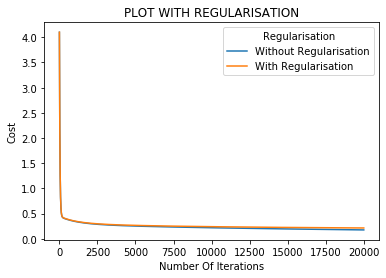


[Time Analysis]:
CPU times: user 1.35 s, sys: 27.7 ms, total: 1.38 s
Wall time: 1.41 s


In [74]:
%%time

# parameters
num_iters = 20000
learning_rate = 0.0001
lambd = 100

# call function for normal
theta, cost = linearRegression(X_train, Y_train, learning_rate, num_iters)
print('[Theta Values For Regression With Regularisation]:\n ', theta)

# plot cost graph for normal
cost = list(cost)
num_iterations = [x for x in range(1, num_iters+1)]
plt.plot(num_iterations, cost, label = 'Without Regularisation')

# analyse error for normal
print("\n[Error Analysis Without Regularisation]:")
errorAnalysis(X_test, Y_test, theta)

# call regularisation function
theta, cost = linearRegressionWithRegularisation(X_train, Y_train, learning_rate, num_iters, lambd)
print('\n\n[Theta Values For Regression With Regularisation]:\n ', theta)
plt.plot(num_iterations, cost, label = 'With Regularisation')

# output:
print("\n[Error Analysis With Regularisation]:")
errorAnalysis(X_test, Y_test, theta)

# plot labels
plt.legend(loc = 'best', title = 'Regularisation')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost')
plt.title('PLOT WITH REGULARISATION')
plt.show()

print("\n[Time Analysis]:")

##### Step 11: Observe effect of varying $\lambda$ in Linear Regression With Regularisation
Here we repeat the linear regression with regularisation for different values of $\lambda$ and plot these graphs on the same plot 

[Minimum Costs]:
100  =>  0.21489391365231356
10  =>  0.18073123576239927
1  =>  0.17673545735027882
0.1  =>  0.17632909963110263
0.01  =>  0.176288394937063
0.001  =>  0.17628432377729947
0.0001  =>  0.17628391665441853
0  =>  0.17628387141846466


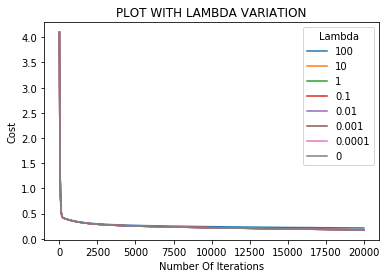


[Time Analysis]:
CPU times: user 5.66 s, sys: 68.8 ms, total: 5.73 s
Wall time: 5.85 s


In [75]:
%%time

# parameters
num_iters = 20000
learning_rate = 0.0001

# generate lambda values
lambdas = [100,10, 1, 1e-1, 1e-2, 1e-3, 1e-4,0]
print('[Minimum Costs]:')

# perform linear regression and get costs for each lambda
for lambda_var in lambdas:
    theta, cost = linearRegressionWithRegularisation(X_train, Y_train, learning_rate, num_iters, lambda_var)
    cost = list(cost)
    
    # plot the costs
    num_iterations = [x for x in range(1, num_iters+1)]
    plt.plot(num_iterations, cost, label = lambda_var)
    plt.xlabel('Number Of Iterations')
    plt.ylabel('Cost')

    # print the final costs
    print(lambda_var, ' => ', cost[-1])
    
# plot the graphs
plt.legend(loc = 'best', title = 'Lambda')
plt.title('PLOT WITH LAMBDA VARIATION')
plt.show()

print("\n[Time Analysis]:")

##### Step 12: Concluding Remarks



1. From step 6: As the number of iterations of gradient descent increases we get closer to the minimum cost.
2. From step 7: The 'best' alpha value was 0.0001 since it gave the best rate of learning without over-stepping
3. From step 8: Feature scaling causes the cost function to converge quicker. Z-score scaling has a more desirable effect than min-max scaling and mean scaling. 
4. From step 9: The contour plot is observed to be more uniform with feature scaling as compared to without.
4. From step 10: By regularization, the parameters of the regression slightly decrease. Also, the performance for the test data is observed to be slightly better.
5. From step 11: At high lambda values, the cost increases slightly as regularization tries not to overfit the data.

#####    Acknowledgement of gratitude 

We owe our sincere thanks to Dr Kagita Venkateshwar Rao Sir , CSE Department NITW for his continuous support, expert guidance and unparalleled teaching methodologies. We also specially thank our other classmates for providing constructive criticism and helping us take this project further. As a team leader, I Rudraksh Kapil express my heartfelt thanks to my teammates for their assistance at all times. We are also indebted to our parents, other teachers and other family members.Finally,  I  bow  my  head  before  God  Almighty  for  his  blessings  in  the  successful completion of the work.

<img src="RK.png">
               

##### References

A part of the work here has been captured from various sources including :
    
1. towardsdatascience.com
2. Classroom Slides by Dr Venkateshwar Rao Sir